# Decomposition on circular polarisation

This notebook provide animated visulation showing how the combination of two circular polarisations can give rise to linear or elliptic polarisation. By changing the different parameters of the simulation like the phase delay between the circular left component and circular right component or the relative amplitude of the components you can visualise how it affects the final polarisation.

In [2]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In the following block of code, you can define the phase shift "dphi" between the circular left (l) and circular right (r) components of the electric field. You can also choose the ratio between the amplitude of the components. The amplitude if the circular right is assumed to be 1 and the amplitude of the ciruclar left is scaled accordingly using the variable "ErElRatio".

For the calculations, we will assume the position position r = 0 and look at the field in time in the XY plane (assuming it is propagating along z). Also we don't need to care about the wavelengths and the frequency so we don't need to define them and can use generic value, as long as we compute the field over a full period. Therefore we will consider that the time varies between 0 and 1, and that the period is 1.
Also note that the circular right wave is computed by summing two linear component with a phase difference of $\pi/2$ and the circular left wave is computer by summing two linear component with a phase difference of $-\pi/2$

In [3]:
dphi = np.pi/2 # Phase delay between Er and El
ErElRatio = 1 # Ratio between Er and El

t = np.linspace(0,1,101)
Erx = np.cos(2*np.pi*t) # Component of circular right on the horizontal axis
Ery = np.cos(2*np.pi*t+np.pi/2) # Component of the circular right on the vertical axis

Elx = ErElRatio*np.cos(2*np.pi*t+dphi) # Component of circular left on the horizontal axis
Ely = ErElRatio*np.cos(2*np.pi*t-np.pi/2+dphi) # Component of circular left on the vertical axis


The rest of the code prepares the ploting area and the animation that can be found at the bottom of this notebook. In this animation, the left circularly polarised field (blue) is repeated at the tip of the right circularly polarised field (red) to show that the sum of the two vectors corresponds to the purple arrow.

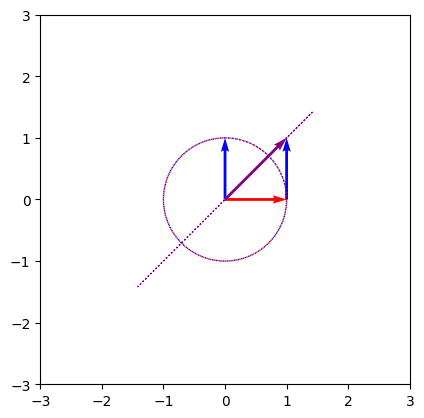

In [4]:
# Create a figure and axes.
fig, ax = plt.subplots()
ax.set_xlim((-3,3)) # Set the limits of the x axis
ax.set_ylim((-3,3)) # Set the limits of the y axis
ax.set_aspect('equal') # Set the aspect ratio so that 1 unit of x corresponds to the same size as 1 unit of y

lineR = ax.quiver(0., 0., 0., 0., scale=1, scale_units='xy', angles='xy', color='red')
lineL = ax.quiver(0., 0., 0., 0., scale=1, scale_units='xy', angles='xy', color='blue')
lineT = ax.quiver(0., 0., 0., 0., scale=1, scale_units='xy', angles='xy', color='purple')
lineLT = ax.quiver(0., 0., 0., 0., scale=1, linestyle='--', scale_units='xy', angles='xy', color='blue')
lineR_env, = ax.plot(0., 0., color='red', linestyle=':', linewidth=1)
lineL_env, = ax.plot(0., 0., color='blue', linestyle=':', linewidth=1)
line, = ax.plot(0., 0., color='purple', linestyle=':', linewidth=1)

# Animation function. This function is called sequentially.
def drawframe(n):
    lineR.set_UVC(Erx[n], Ery[n])
    lineL.set_UVC(Elx[n], Ely[n])
    lineT.set_UVC(Erx[n]+Elx[n], Ery[n]+Ely[n])
    lineLT.set_offsets([[Erx[n], Ery[n]]])
    lineLT.set_UVC(Elx[n], Ely[n])
    lineR_env.set_data(Erx, Ery)
    lineL_env.set_data(Elx, Ely)
    line.set_data(Erx+Elx, Ery+Ely)
    return lineR, lineL, lineT

from matplotlib import animation

anim = animation.FuncAnimation(fig, drawframe, frames=101, interval=40, blit=True)
from IPython.display import HTML
HTML(anim.to_jshtml())

